In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

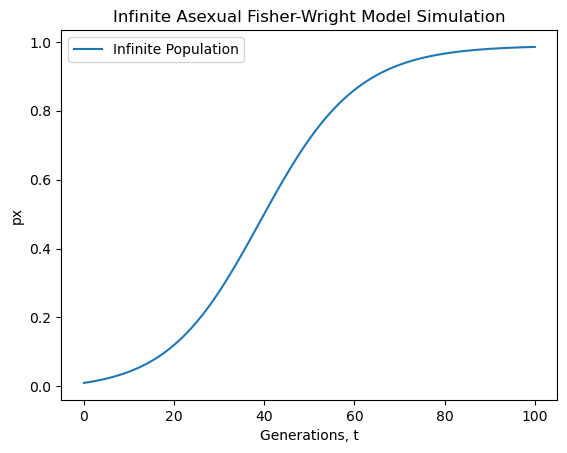

In [3]:
def infinite_fw(px, t, s, n, m):
    num = px * (s - n - m - n * s) + m - s * (px ** 2)
    denom = 1 + s * px
    return num / denom

s = 0.1
m = 0.001
n = 0.001
initialpx = 0.01
time = np.linspace(0, 100, 100)

result = odeint(infinite_fw, initialpx, time, args=(s,n,m))
plt.plot(time, result, label='Infinite Population')
plt.xlabel('Generations, t')
plt.ylabel('px')
plt.title('Infinite Asexual Fisher-Wright Model Simulation')
plt.legend()
plt.show()


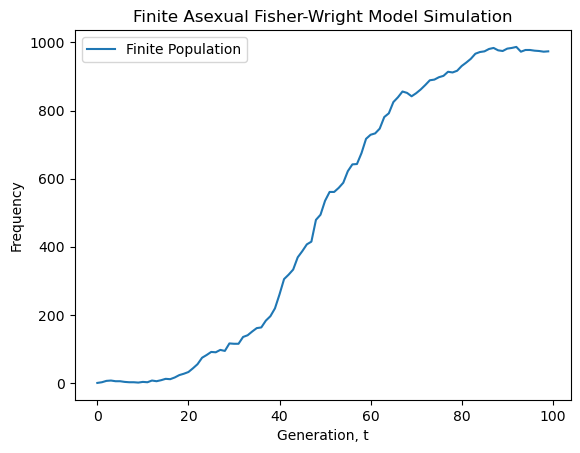

In [4]:
def finite_fw(N, x, s, m, n, T):
    mut_arr = np.zeros(T)
    
    for t in range(T):
        num = (1 - n) * (1 + s) * x + m *(N - x)
        denom = N + s * x
        psm = num / denom
        x = np.random.binomial(N, psm)
        mut_arr[t] = x
    
    return mut_arr

N = 1000
initialx = 0.01
s = 0.1
m = 0.001
n = 0.001
T = 100

result = finite_fw(N, initialx, s, m, n, T)

plt.plot(range(T), result, label='Finite Population')
plt.xlabel('Generation, t')
plt.ylabel('Frequency')
plt.title('Finite Asexual Fisher-Wright Model Simulation')
plt.legend()
plt.show()

Running the model multiple times provides different graphs. Which shows that the binomial process introduces some randomness to the simulation, to model the genetic drift in finite population. X is determined by a binomial distribution, which uses random sampling.

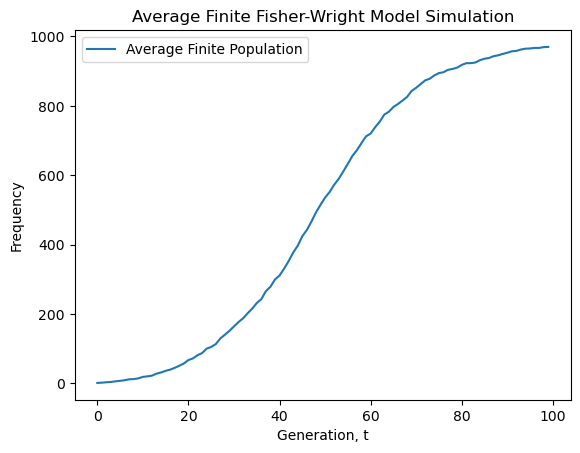

In [5]:
def average_fw(N, initialx, s, m, n, T, runs):
    result_list = []

    for i in range(runs):
        result = finite_fw(N, initialx, s, m, n, T)
        result_list.append(result)
    
    average_result = np.mean(result_list, axis=0)
    
    return average_result

runs = 10
average_result = average_fw(N, initialx, s, m, n, T, runs)

plt.plot(range(T), average_result, label='Average Finite Population')
plt.xlabel('Generation, t')
plt.ylabel('Frequency')
plt.title('Average Finite Fisher-Wright Model Simulation')
plt.legend()
plt.show()

Indeed averaging results brings the model closer to the infinite model.

In [6]:
# Algorithm:
# Find value in xN_list where >0.95, return index
# Index = Takeover time
# For each s, there is a new takeover time
# plot s against takeover times

def takeover(N, initialx, s, m, n, T, runs):
    result_list = []
    
    for i in range(runs):
        result = finite_fw(N, initialx, s, m, n, T)
        result_list.append(result)
        
    average_result = np.mean(result_list, axis=0)
    xN_list = average_result / N
    
    takeover_time = None
    for t, n in enumerate(xN_list):
        if n > 0.95:
            takeover_time = t
            break
            
    return takeover_time

    

Text(0.5, 1.0, 'Scatter plot of Takeover Time vs Selection Strength')

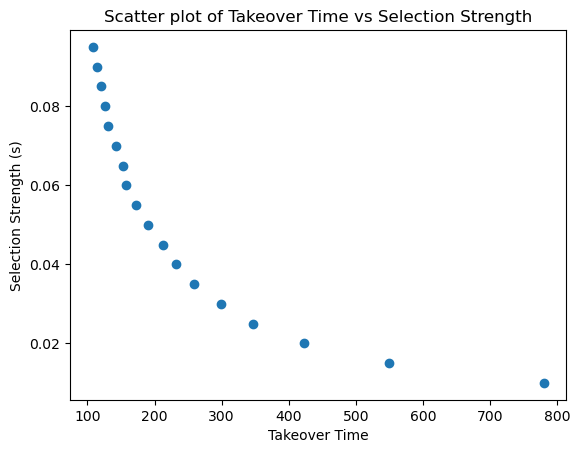

In [7]:
N = 100000
initialx = 0.01
s = np.arange(0.01, 0.1, 0.005)
m = 0.0001
n = 0.0001
T = 1000
runs = 10

takeover_times = []

for strength in s:
    takeover_time = takeover(N, initialx, strength, m, n, T, runs)
    takeover_times.append(takeover_time)
    
plt.scatter(takeover_times, s)
plt.xlabel('Takeover Time')
plt.ylabel('Selection Strength (s)')
plt.title('Scatter plot of Takeover Time vs Selection Strength')

Selection strength and takeover time appear negatively correlated. A higher selection strength leads to a shorter takeover time in a population.

Text(0.5, 1.0, 'Scatter plot of Takeover Time vs Mutation Rate (m)')

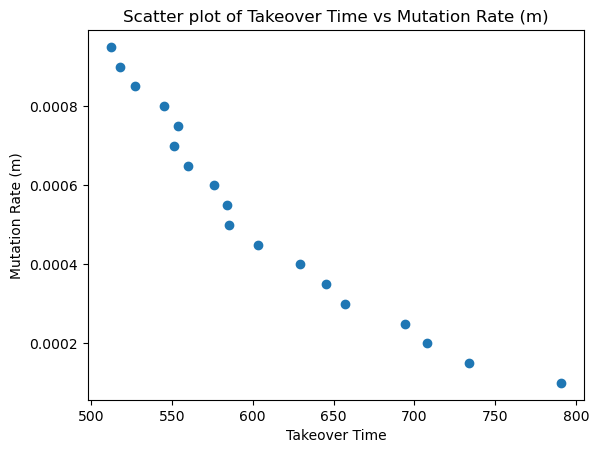

In [8]:
N = 100000
initialx = 0.01
s = 0.01
m = np.arange(0.0001, 0.001, 0.00005)
n = np.arange(0.0001, 0.001, 0.00005)
T = 1000
runs = 10

takeover_times_m = []

for mrate in m:
    takeover_time_m = takeover(N, initialx, s, mrate, n[0], T, runs)
    takeover_times_m.append(takeover_time_m)
    
plt.scatter(takeover_times_m, m)
plt.xlabel('Takeover Time')
plt.ylabel('Mutation Rate (m)')
plt.title('Scatter plot of Takeover Time vs Mutation Rate (m)')

Mutation rate and takeover time also appear to be negatively correlated. A higher mutation rate (m) leads to a shorter takeover time in a population.

Text(0.5, 1.0, 'Scatter plot of Takeover Time vs Mutation Rate (n)')

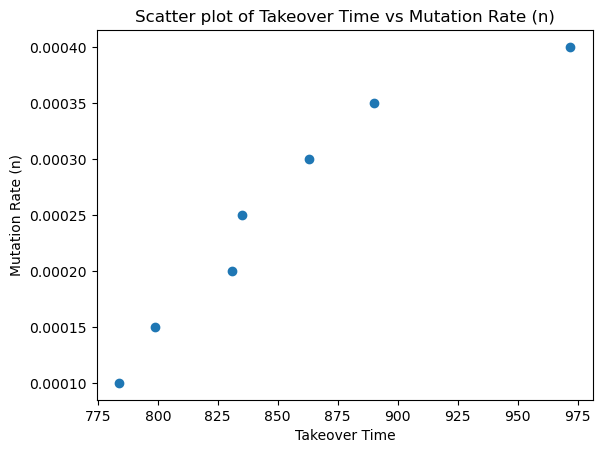

In [9]:
takeover_times_n = []

for nrate in n:
    takeover_time_n = takeover(N, initialx, s, m[0], nrate, T, runs)
    takeover_times_n.append(takeover_time_n)
    
plt.scatter(takeover_times_n, n)
plt.xlabel('Takeover Time')
plt.ylabel('Mutation Rate (n)')
plt.title('Scatter plot of Takeover Time vs Mutation Rate (n)')

Mutation rate (n) and Takeover time seem to be positively correlated. A higher mutation rate (n) leads to a slower takeover time, compared to a lower mutation rate.

Text(0.5, 1.0, 'Scatter plot of Takeover Time vs Population (N)')

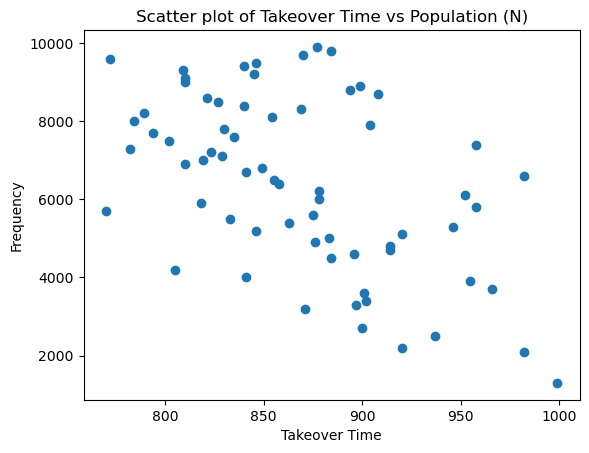

In [10]:
N = np.arange(100,10000,100)
initialx = 0.01
s = 0.01
m = 0.0001
n = 0.0001
T = 1000
runs = 10

takeover_times_N = []

for N_values in N:
    takeover_time_N = takeover(N_values, initialx, s, m, n, T, runs)
    takeover_times_N.append(takeover_time_N)
    
plt.scatter(takeover_times_N, N)
plt.xlabel('Takeover Time')
plt.ylabel('Frequency')
plt.title('Scatter plot of Takeover Time vs Population (N)')

Population size appears to not have any direct relationship with the takeover time at other fixed parameters.

For a successful takeover, there should be a high selection strength (s), a high mutation rate (m) and a low mutation rate (n).

# Part 2

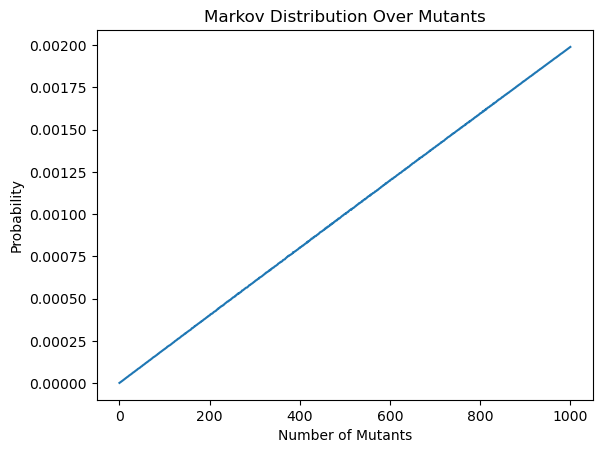

In [22]:

def compute_transition_matrix(N, s, m, n):
    transition_matrix = np.zeros((N + 1, N + 1))
    
    for x in range(N + 1):
        num = (1 - n) * (1 + s) * x + m * (N - x)
        denom = N + s * x
        psm = num / denom
        transition_matrix[x] = np.random.binomial(N, psm, size=N + 1)
            
    # normalizing each column
    transition_matrix /= transition_matrix.sum(axis=0, keepdims=True)

    return transition_matrix

def compute_markov_distribution(N, s, m, n, T):
    initial_probabilities = np.zeros(N + 1)
    initial_probabilities[0] = 1

    transition_matrix = compute_transition_matrix(N, s, m, n)

    probabilities = np.dot(np.linalg.matrix_power(transition_matrix, T), initial_probabilities)

    return probabilities

N = 1000
s = 0.01
m = 0.001
n = 0.001
T = 1000

probabilities = compute_markov_distribution(N, s, m, n, T)

plt.plot(np.arange(N + 1), probabilities)
plt.xlabel('Number of Mutants')
plt.ylabel('Probability')
plt.title('Markov Distribution Over Mutants')
plt.show()


I don't know why the graph is levelled like this. It appears that the multiplication of the probability matrix and transition matrix is causing this. I was not in the lab to find out how the initial conditions translate to this assignment, so I suspect that's why.

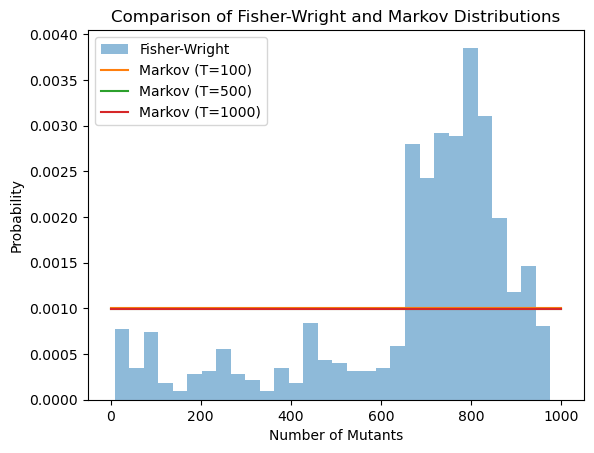

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def compute_markov_distribution(N, s, m, n, T):
    transition_matrix = compute_transition_matrix(N, s, m, n)

    initial_distribution = np.zeros(N + 1)
    initial_distribution[0] = 1.0

    probabilities = np.dot(np.linalg.matrix_power(transition_matrix, T), initial_distribution)

    return probabilities

def compute_transition_matrix(N, s, m, n):
    transition_matrix = np.zeros((N + 1, N + 1))

    for x in range(N + 1):
        num = (1 - n) * (1 + s) * x + m * (N - x)
        denom = N + s * x
        psm = num / denom
        transition_matrix[x] = np.random.binomial(N, psm, size=N + 1)

    # normalizizing each column
    transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

    return transition_matrix

def finite_fw(N, x, s, m, n, T):
    mut_arr = np.zeros(T)

    for t in range(T):
        num = (1 - n) * (1 + s) * x + m * (N - x)
        denom = N + s * x
        psm = num / denom
        x = np.random.binomial(N, psm)
        mut_arr[t] = x

    return mut_arr

# Parameters
N = 1000
s = 0.01
m = 0.001
n = 0.001
T = 1000
initialx = 0.01

fisher_wright_distribution = finite_fw(N, int(N * initialx), s, m, n, T)

markov_distributions = {}
for t in [100, 500, 1000]:
    markov_distributions[t] = compute_markov_distribution(N, s, m, n, t)

plt.hist(fisher_wright_distribution, bins=30, density=True, alpha=0.5, label='Fisher-Wright')

for t, distribution in markov_distributions.items():
    plt.plot(np.arange(N + 1), distribution, label=f'Markov (T={t})')

plt.xlabel('Number of Mutants')
plt.ylabel('Probability')
plt.title('Comparison of Fisher-Wright and Markov Distributions')
plt.legend()
plt.show()


Once again the scaling by W^t has proven to not work very well. The Markov distribution is not showing up as it should. Unfortunately no online sources give a hint at to what to do.

# Part 3

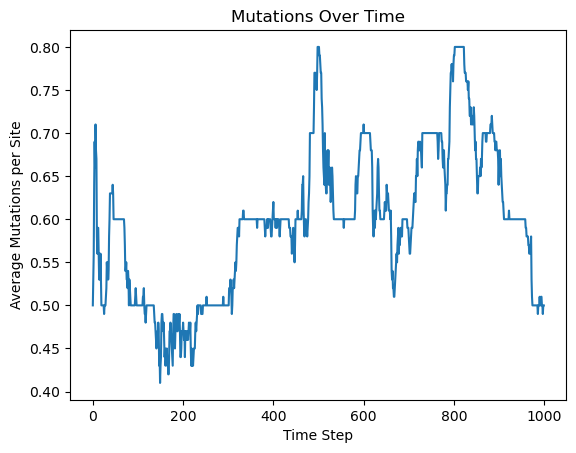

In [29]:
def evolve_population(population, s, m):
    N, L = population.shape
    mutants_count = np.sum(population, axis=1)  
    
    # selective advasntage
    fitness = (1 + s) ** mutants_count
    
    pi = fitness / np.sum(fitness)
    
    parents = np.random.choice(N, size=N, p=pi)
    children = population[parents] 
    
    # flipping gene with probability m=n
    mutations = np.random.rand(N, L) < m
    children ^= mutations
    
    return children

N = 10  
L = 10  # 0000000000 sequence
s = 0.01  
m = 0.001  
T = 1000
# bitwise_xor needs different array
population = np.random.choice([0, 1], size=(N, L))

mutations_per_site = np.zeros(T)
for t in range(T):
    population = evolve_population(population, s, m)
    
    # average number of mutations over 1000 steps
    mutations_per_site[t] = np.mean(population)

plt.plot(mutations_per_site)
plt.xlabel('Time Step')
plt.ylabel('Average Mutations per Site')
plt.title('Mutations Over Time')
plt.show()

In [33]:
def evolve_population(population, s, m):
    N, L = population.shape
    mutants_count = np.sum(population, axis=1)  
    
    # selective advasntage
    fitness = (1 + s) ** mutants_count
    
    pi = fitness / np.sum(fitness)
    
    parents = np.random.choice(N, size=N, p=pi)
    #introducing crossover here
    children = population[parents] 
    
    # flipping gene with probability m=n
    mutations = np.random.rand(N, L) < m
    children ^= mutations
    
    return children

N = 10  
L = 10  # 0000000000 sequence
s = 0.01  
m = 0.001  
T = 1000
# bitwise_xor needs different array
population = np.random.choice([0, 1], size=(N, L))


Parameters that cause deviation from Markov model:

A high selection strength s causes higher fitness to those without mutations. Higher mutations rates, similarily, lead to a faster fitness and spread. Population size will lead to greater reproduction and increasing chances of mutation occuring in the offspring. Crossover rate may also contribute. All of these parameters can cause deviation from the Markov model as scene in the lecture.